In [1]:
#Solo usar si esta en colab
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Grupo inteligencia/ProyectoIA')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Grupo inteligencia/ProyectoIA


In [363]:
#PRIMER BOCETO PROYECTO IA
#Julian David Colmenares
#Juan Sebastian Leon
#Laura Vargas de Leon


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [364]:
data2 = pd.read_csv('datasets_469690_880822_column_3C.csv')
data1 = pd.read_csv('datasets_469690_880822_column_2C.csv')

In [365]:
data1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [366]:
print(data1.shape)
print(data2.shape)

(310, 7)
(310, 7)


In [367]:
data2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [368]:
#Dividimos el dataset para observar cuantos datos hay de cada clase
dataAbnormal=data1[data1['class']=='Abnormal']
dataNormal=data1[data1['class']!='Abnormal']
print(dataNormal.shape)
print(dataAbnormal.shape)

(100, 7)
(210, 7)


In [369]:
#uniendo los dos dataset nuevamente
dataBin = pd.concat((dataNormal, dataAbnormal)).sample(frac=1).reset_index(drop=True)
dataBin=dataBin.replace(to_replace='Normal', value=0, regex=True)
dataBin=dataBin.replace(to_replace='Abnormal', value=1, regex=True)
dataBin=np.random.permutation(dataBin.values)
dataBin=pd.DataFrame(dataBin)
dataBin.head(10)

,0,1,2,3,4,5,6
0,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,0.0
1,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,1.0
2,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1.0
3,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,0.0
4,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1.0
5,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,1.0
6,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,1.0
7,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,1.0
8,56.447026,19.444499,43.577846,37.002527,139.189690,-1.859689,0.0
9,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,1.0


In [370]:
print(dataBin.shape)

(310, 7)


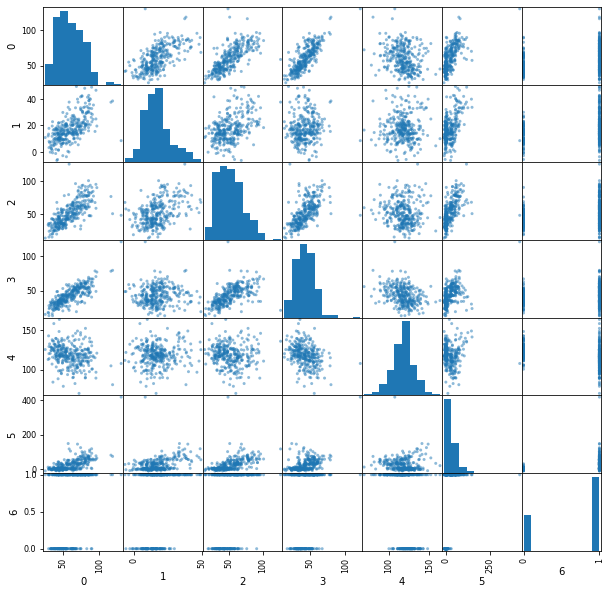

In [371]:
pd.plotting.scatter_matrix(dataBin, figsize=(10,10));

In [372]:
#elimiinamos columna con correlacion
del dataBin[0]
dataBin.head()

,1,2,3,4,5,6
0,11.935110,43.000000,42.207298,122.209083,0.153549,0.0
1,17.385191,52.000000,55.175511,119.193724,32.108537,1.0
2,18.823727,76.032156,55.271004,128.405731,73.388216,1.0
3,26.328369,50.958964,37.983498,106.177751,3.118221,0.0
4,33.942432,85.101608,46.169139,125.593624,100.292107,1.0


In [373]:
#dividimos entre 0 y 1
dataAbnormal=dataBin[dataBin[6]==1]
dataNormal=dataBin[dataBin[6]!=1]
#permutamos abnormales y Normales
np.random.permutation(dataAbnormal.values)
np.random.permutation(dataNormal.values)
#elegimos 90 abnomales y 90 normales
dataAbnormalFit=dataAbnormal.values[:90,:]
dataNormalFit=dataNormal.values[:90, :]
#elegimos datos del test
dataAbnormalTest=dataAbnormal.values[90:,:]
dataNormalTest=dataNormal.values[90:,:]

dataAbnormalFit=pd.DataFrame(dataAbnormalFit)
dataNormalFit=pd.DataFrame(dataNormalFit)
dataAbnormalTest=pd.DataFrame(dataAbnormalTest)
dataNormalTest=pd.DataFrame(dataNormalTest)


In [374]:
#unir test y fit en cada dataset
dataBinTrain=pd.concat([dataAbnormalTest, dataNormalTest])
dataBinTest=pd.concat([dataAbnormalFit, dataNormalFit])

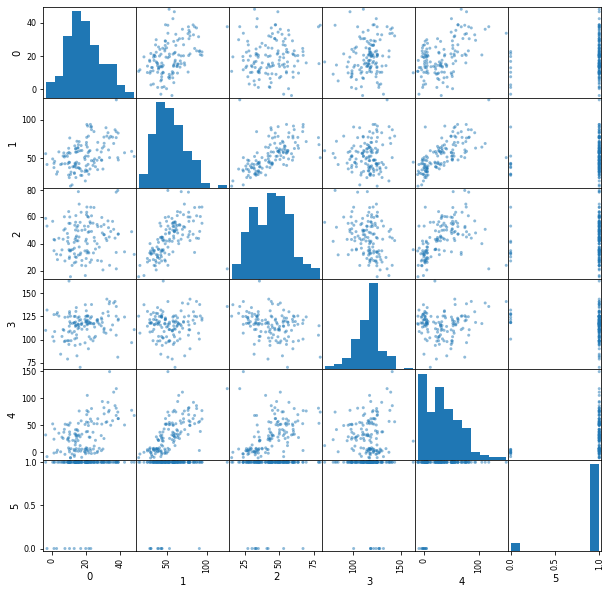

In [375]:
pd.plotting.scatter_matrix(dataBinTrain, figsize=(10,10));

In [376]:
#permutamos de nuevo antes de pasar a aentrenar

dataClassTrain=np.random.permutation(dataBinTrain.values)
dataClassTest=np.random.permutation(dataBinTest.values)


In [377]:

est = GaussianNB()
##no elegimos un valor n porque ya teniamos separados los valores de entrenamiento y testeo

X_train = dataClassTrain[:,:5]
X_test =dataClassTest[:,:5]
y_train =dataClassTrain[:,-1]
y_test =dataClassTest[:,-1]

est.fit(X_train,y_train)
predictions=est.predict(X_test)
accuracy_score(predictions,y_test)


0.75

In [378]:
#se definen los estimadores tpr y tnr
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [385]:
# Ahora aplicamos decision Tree
## SE DEBE USAR TODOS LOS DATOS O TAMBIEN CON TRAIN Y TEST??


est = DecisionTreeClassifier()
est.fit(X_train,y_train)
predictions2=est.predict(X_test)
print(accuracy_score(predictions2,y_test))

s = cross_val_score(est, X_train, y_train, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X_train, y_train, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X_train,y_train, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.7222222222222222
accuracy 0.892 (+/- 0.07050)
tpr      0.935 (+/- 0.08004)
tnr      nan (+/- nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **

In [386]:

est.feature_importances_

array([0.24172653, 0.        , 0.1675485 , 0.05714286, 0.53358211])

# **`Segundo dataset`**

In [387]:
data2["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

 **Eliminamos los casos Normales**

In [388]:
## eliminamos lo casos normales
dataClass=data2[data2['class']!='Normal']

In [389]:
##cambio de label "class" con 1='hernia' y 0='Spondylolisthesis'
dataClass=dataClass.replace(to_replace='Spondylolisthesis', value=0, regex=True)
dataClass=dataClass.replace(to_replace='Hernia', value=1, regex=True)
#dataClass=np.random.permutation(dataClass.values)
#mezclar valores de "dataClass"
dataClass =dataClass.sample(frac=1).reset_index(drop=True)

dataClass.head(10)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,70.250436,10.340123,76.370070,59.910314,119.237007,32.666502,0
1,41.729963,12.254074,30.122586,29.475889,116.585706,-1.244402,1
2,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0
3,53.854798,19.230643,32.779060,34.624155,121.670915,5.329843,1
4,49.782121,6.466805,53.000000,43.315316,110.864783,25.335647,0
5,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,1
6,44.253476,1.101087,38.000000,43.152390,98.274107,23.910635,0
7,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,0
8,48.915551,19.964556,40.263794,28.950995,119.321358,8.028895,1
9,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,0


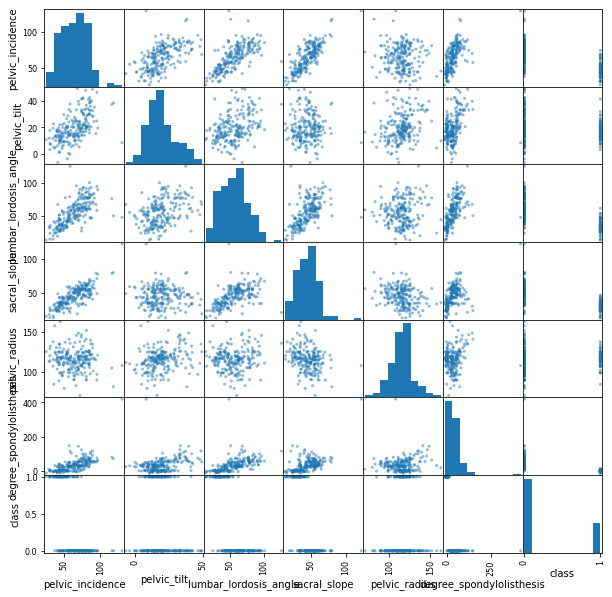

In [390]:
pd.plotting.scatter_matrix(dataClass, figsize=(10,10));

In [391]:
#elimiinamos columna con correlacion
del dataClass["pelvic_incidence"]
dataBin.head()

,1,2,3,4,5,6
0,11.935110,43.000000,42.207298,122.209083,0.153549,0.0
1,17.385191,52.000000,55.175511,119.193724,32.108537,1.0
2,18.823727,76.032156,55.271004,128.405731,73.388216,1.0
3,26.328369,50.958964,37.983498,106.177751,3.118221,0.0
4,33.942432,85.101608,46.169139,125.593624,100.292107,1.0


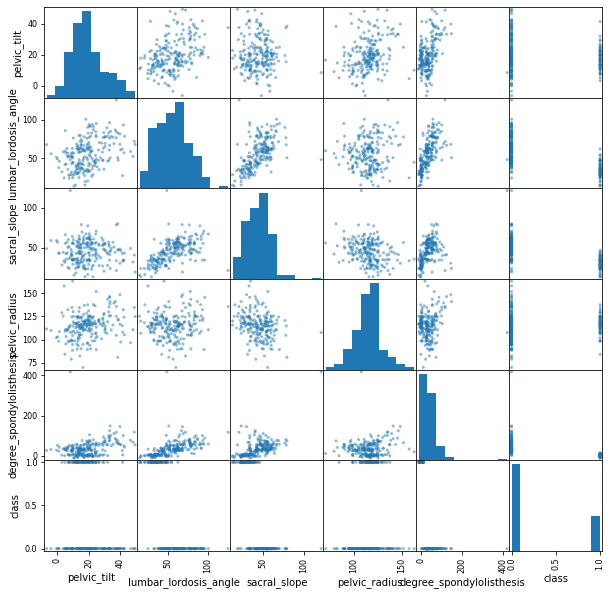

In [392]:
pd.plotting.scatter_matrix(dataClass, figsize=(10,10));

(90, 6) (42, 6) train
(60, 6) (18, 6) test


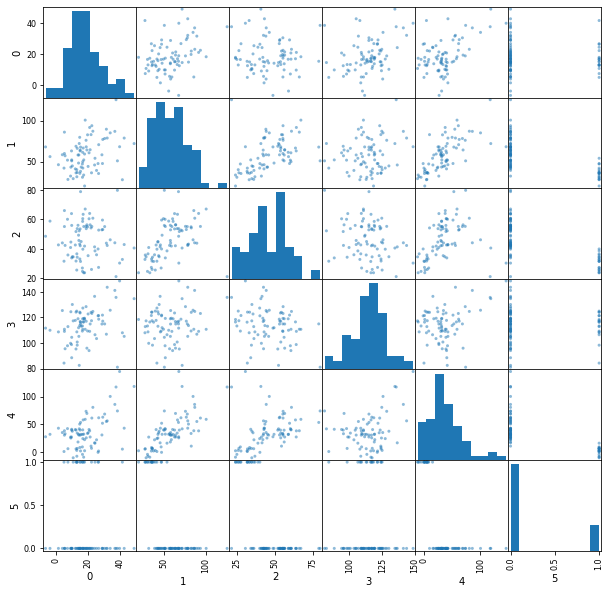

In [393]:
#dividimos entre 0 y 1
dataHernia=dataClass[dataClass['class']==1]
dataSpondylolisthesis=dataClass[dataClass['class']!=1]

#elegimos 45 Hernia y 45 Spondylolisthesis
dataSpondylolisthesisTrain=dataSpondylolisthesis.values[:90,:]
dataHerniaTrain=dataHernia.values[:42, :]
print(dataSpondylolisthesisTrain.shape,dataHerniaTrain.shape,"train")
#elegimos datos del test con los restantes
dataSpondylolisthesisTest=dataSpondylolisthesis.values[90:,:]
dataHerniaTest=dataHernia.values[42:,:]
print(dataSpondylolisthesisTest.shape,dataHerniaTest.shape,"test")
#permutamos Hernia y Spondylolisthesis tanto test como train
np.random.permutation(dataHerniaTrain)
np.random.permutation(dataSpondylolisthesisTrain)
np.random.permutation(dataHerniaTest)
np.random.permutation(dataSpondylolisthesisTest)
#convertimos de nuevo los datos de formato numpy a dataframe 
dataSpondylolisthesisFit=pd.DataFrame(dataSpondylolisthesisTest)
dataHerniaFit=pd.DataFrame(dataHerniaTest)
dataSpondylolisthesis=pd.DataFrame(dataSpondylolisthesisTrain)
dataHernia=pd.DataFrame(dataHerniaTrain)
#unimops de nuevo los dataframe
dataClassTrain=pd.concat([dataSpondylolisthesis, dataHernia])
dataClassTest=pd.concat([dataSpondylolisthesisFit, dataHerniaFit])
dataClassTest.shape
pd.plotting.scatter_matrix(dataClassTest, figsize=(10,10));

In [394]:
#permutamos de nuevo antes de pasar a aentrenar
dataClassTrain=np.random.permutation(dataClassTrain.values)
dataClassTest=np.random.permutation(dataClassTest.values)

In [395]:

from sklearn.naive_bayes import GaussianNB
est = GaussianNB()
##no elegimos un valo n porque ya teniamos separados los valores de entrenamiento y testeo

X_train = dataClassTrain[:,:5]
X_test =dataClassTest[:,:5]
y_train =dataClassTrain[:,-1]
y_test =dataClassTest[:,-1]

est.fit(X_train,y_train)
predictions=est.predict(X_test)
accuracy_score(predictions,y_test)


0.9743589743589743

In [396]:
# Ahora aplicamos decision Tree
## SE DEBE USAR TODOS LOS DATOS O TAMBIEN CON TRAIN Y TEST??


est = DecisionTreeClassifier()
est.fit(X_train,y_train)
predictions2=est.predict(X_test)
print(accuracy_score(predictions2,y_test))

s = cross_val_score(est, X_train, y_train, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X_train, y_train, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X_train,y_train, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.9743589743589743
accuracy 0.970 (+/- 0.03704)
tpr      0.980 (+/- 0.06000)
tnr      0.970 (+/- 0.04636)


In [397]:
est.feature_importances_

array([0.        , 0.01080877, 0.03250365, 0.04656085, 0.91012674])